<a href="https://colab.research.google.com/github/Seitenshi/Board-Exam-Data-Analytics/blob/main/Neural_Network_with_SGD_optim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.model_selection import train_test_split

In [ ]:
# Load the data from the uploaded CSV file
url = 'https://raw.githubusercontent.com/Seitenshi/Board-Exam-Data-Analytics/main/BED%20Test%20-%20Combined.csv'
df = pd.read_csv(url)

In [ ]:
# Data preprocessing
df['Remarks'] = df['Remarks'].replace({'FAILED': 0, 'PASSED': 1})  # Convert string labels to integers
df = df.dropna()  # Drop rows with missing values
df = df.drop(['Subj01', 'Subj02', 'Subj03', 'Gen. Average'], axis=1)  # Drop unnecessary columns

# Split the data into features (X) and target (y)
X = df.drop('Remarks', axis=1).values
y = df['Remarks'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

# Convert data to PyTorch tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [ ]:
# Define the improved model
class ImprovedModel(nn.Module):
    def __init__(self, input=8, hidden=164, output=2):
        super(ImprovedModel, self).__init__()
        self.fc1 = nn.Linear(input, hidden)
        self.fc2 = nn.Linear(hidden, output)
        self.dropout = nn.Dropout(0.2)  # Add dropout with 20% probability

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout(x)  # Apply dropout after activation
        x = self.fc2(x)
        return x

In [ ]:
# Instantiate the improved model
improved_model = ImprovedModel()

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss() #nn.BCELoss() try this
optimizer = torch.optim.SGD(improved_model.parameters(), lr=0.01, momentum=0.9)

In [ ]:
# Training loop
epochs = 500
train_losses = []
for epoch in range(epochs):
    improved_model.train()  # Set the model to training mode
    optimizer.zero_grad()
    outputs = improved_model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())
    if epoch % 10 == 0:
        print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss.item():.4f}')



Epoch 1/500, Loss: 0.6972
Epoch 11/500, Loss: 0.6628
Epoch 21/500, Loss: 0.6392
Epoch 31/500, Loss: 0.6316
Epoch 41/500, Loss: 0.6385
Epoch 51/500, Loss: 0.6375
Epoch 61/500, Loss: 0.6212
Epoch 71/500, Loss: 0.6360
Epoch 81/500, Loss: 0.6338
Epoch 91/500, Loss: 0.6214
Epoch 101/500, Loss: 0.6415
Epoch 111/500, Loss: 0.6214
Epoch 121/500, Loss: 0.6137
Epoch 131/500, Loss: 0.6165
Epoch 141/500, Loss: 0.6050
Epoch 151/500, Loss: 0.6153
Epoch 161/500, Loss: 0.6037
Epoch 171/500, Loss: 0.6023
Epoch 181/500, Loss: 0.6003
Epoch 191/500, Loss: 0.6041
Epoch 201/500, Loss: 0.6024
Epoch 211/500, Loss: 0.6040
Epoch 221/500, Loss: 0.5954
Epoch 231/500, Loss: 0.5976
Epoch 241/500, Loss: 0.5985
Epoch 251/500, Loss: 0.5791
Epoch 261/500, Loss: 0.5892
Epoch 271/500, Loss: 0.5974
Epoch 281/500, Loss: 0.6058
Epoch 291/500, Loss: 0.6016
Epoch 301/500, Loss: 0.5940
Epoch 311/500, Loss: 0.5830
Epoch 321/500, Loss: 0.5977
Epoch 331/500, Loss: 0.5806
Epoch 341/500, Loss: 0.5968
Epoch 351/500, Loss: 0.5923
Epo

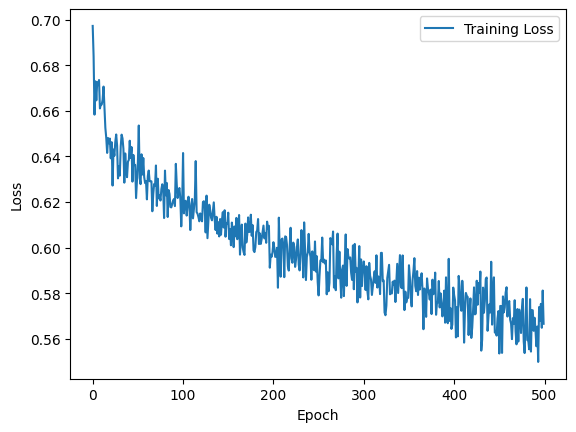

In [ ]:
# Plot the training loss
import matplotlib.pyplot as plt
plt.plot(range(epochs), train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
# Evaluate the model on the test set
improved_model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    outputs = improved_model(X_test)
    _, predicted = torch.max(outputs, 1)
    accuracy = (predicted == y_test).sum().item() / len(y_test) * 100
    print(f'Test Accuracy: {accuracy:.2f}%')

Test Accuracy: 75.00%


In [ ]:
# Checking if the model predicts properly
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = improved_model.forward(data)

    # Semi Predictions
    print(f'{i+1}.) {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')

    # Checking if correct or not
    if y_val.argmax().item() == y_test[i]:
      correct +=1

print(f'No of correct items: {correct}')

1.) tensor([-0.8073,  0.8277]) 	 1 	 1
2.) tensor([-0.4791, -0.3760]) 	 0 	 1
3.) tensor([-0.0415, -0.1163]) 	 0 	 0
4.) tensor([-0.2044,  0.1514]) 	 1 	 1
5.) tensor([-0.4205, -0.0916]) 	 0 	 1
6.) tensor([-1.3762,  1.4742]) 	 1 	 1
7.) tensor([-0.2294,  0.3654]) 	 0 	 1
8.) tensor([-2.1310,  1.6654]) 	 1 	 1
9.) tensor([-0.5982,  0.2074]) 	 1 	 1
10.) tensor([-0.2564,  0.3088]) 	 0 	 1
11.) tensor([0.0410, 0.0790]) 	 1 	 1
12.) tensor([-0.0003, -0.1720]) 	 0 	 0
13.) tensor([-0.2326,  0.2133]) 	 1 	 1
14.) tensor([-0.4791, -0.3760]) 	 1 	 1
15.) tensor([-0.3764, -0.0440]) 	 1 	 1
16.) tensor([-0.5706,  0.1660]) 	 1 	 1
17.) tensor([0.3434, 0.2958]) 	 1 	 0
18.) tensor([ 0.0611, -0.3285]) 	 0 	 0
19.) tensor([-1.1016,  0.8637]) 	 1 	 1
20.) tensor([-0.6328, -0.2375]) 	 1 	 1
21.) tensor([0.0588, 0.0257]) 	 0 	 0
22.) tensor([-0.5997,  0.0096]) 	 1 	 1
23.) tensor([-1.6562,  1.3216]) 	 1 	 1
24.) tensor([-0.0168,  0.1532]) 	 1 	 1
25.) tensor([-0.0784,  0.2778]) 	 1 	 1
26.) tensor([-0